In [1]:
import numpy as np
import pandas as pd
from thesis import *

In [2]:
with open(u".\spam.csv") as f:
    lines = f.readlines()
X = []
y = []
for line in lines:
    if line[0] == 'h':
        y.append(0)
        string = line[4 : len(line) - 4]
        ss = ''
        for s in string:
            if s == ' ' or (ord(s) >= ord('a') and ord(s) <= ord('z')) or (ord(s) >= ord('A') and ord(s) <= ord('Z')):
                ss += s
        X.append(ss)
    else:
        y.append(1)
        string = line[5 : len(line) - 4]
        ss = ''
        for s in string:
            if s == ' ' or (ord(s) >= ord('a') and ord(s) <= ord('z')) or (ord(s) >= ord('A') and ord(s) <= ord('Z')):
                ss += s
        X.append(ss)
y = np.array(y)
print (y[ : 5])
print (X[2 : 3])
print (len(X), len(y))

[1 0 0 1 0]
['Ok lar Joking wif u oni']
5575 5575


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X)
X_train.shape

(5575, 8605)

In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)
X_train_tf = tf_transformer.transform(X_train)
X_train_tf.shape
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_train_tfidf.shape

(5575, 8605)

In [5]:
data = X_train_tfidf
print (data[1 : 2])

  (0, 8347)	0.22473179099275264
  (0, 8093)	0.18581311333002104
  (0, 7841)	0.22960295284924395
  (0, 7404)	0.16172359018914664
  (0, 5548)	0.2548886331714157
  (0, 5131)	0.15627437346164308
  (0, 3936)	0.26716298074304856
  (0, 3780)	0.3258745122814397
  (0, 3492)	0.10740004091885813
  (0, 2969)	0.18138592683933122
  (0, 2930)	0.15278163920465293
  (0, 2873)	0.1473400121007295
  (0, 1567)	0.2523718059493552
  (0, 1284)	0.2753031516370962
  (0, 952)	0.2753031516370962
  (0, 950)	0.3110833374877464
  (0, 491)	0.24780591387099948
  (0, 249)	0.3258745122814397


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = 11)

In [7]:
def make_worker(*args):
    return Worker(X_train, X_test, y_train, y_test, *args)

results = []

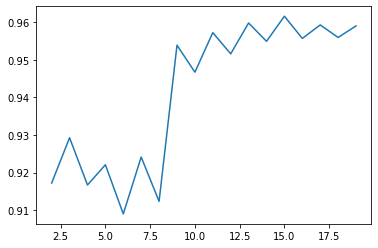

Best k =  15
Best score =  0.9615571752191471
classifier 	 =  knn
False positive error 	 =  0.001195457262402869
True negative error 	 =  0.04064554692169755
False negative 	 =  0.9986225895316805
True positive 	 =  0.6923076923076923
TIME 	 =  0:00:00.298994


In [8]:
import time
import datetime
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

results.append(make_worker(range(2, 20), lambda k: KNeighborsClassifier(n_neighbors=k)).all_in_one("knn"))

x:\python39\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
x:\python39\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
x:\python39\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
x:\python39\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
x:\python39\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


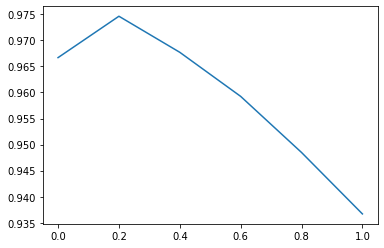

Best k =  0.2
Best score =  0.9746291736432582
classifier 	 =  MultinomialNB
False positive error 	 =  0.010161386730424387
True negative error 	 =  0.016138673042438732
False negative 	 =  0.9882920110192838
True positive 	 =  0.8778280542986425
TIME 	 =  0:00:00.006999


In [9]:
from sklearn.naive_bayes import MultinomialNB

C = config['MultinomialNB']
results.append(
    make_worker(C, lambda k: MultinomialNB(alpha=k, class_prior=None, fit_prior=True))
        .all_in_one("MultinomialNB"))

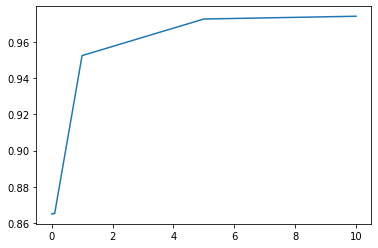

Best k =  10
Best score =  0.9743730916970353
classifier 	 =  LogisticRegression
False positive error 	 =  0.0
True negative error 	 =  0.024506873879258817
False negative 	 =  1.0
True positive 	 =  0.8144796380090498
TIME 	 =  0:00:00.136993


In [10]:
from sklearn.linear_model import LogisticRegression

C = config['LogisticRegression']

results.append(
    make_worker(C, lambda k: LogisticRegression(C=k))
        .all_in_one("LogisticRegression"))

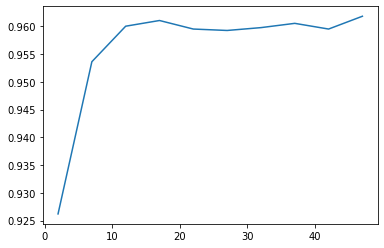

Best k =  47
Best score =  0.961812600544995
classifier 	 =  DecisionTreeClassifier
False positive error 	 =  0.017931858936043037
True negative error 	 =  0.02510460251046025
False negative 	 =  0.9793388429752066
True positive 	 =  0.8099547511312217
TIME 	 =  0:00:00.267050


In [11]:
from sklearn.tree import DecisionTreeClassifier

C = np.arange(2, 50, 5)

results.append(
    make_worker(C, lambda k: DecisionTreeClassifier(max_depth=k))
        .all_in_one("DecisionTreeClassifier"))

In [ ]:
from sklearn.svm import SVC

C = config['SVC']

results.append(
    make_worker(C, lambda k: SVC(kernel=k))
        .all_in_one("SVC"))


Такого не было даже в дипломе....

In [ ]:
df = pd.DataFrame(columns=columns)
for i in range(len(results)):
    df.loc[i] = results[i]
df